### Importing libraries and getting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
website_df=pd.read_csv(r"C:\Users\DELL\Desktop\Datasets\website_classification.csv")
website_df.head(16)

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
5,5,https://book.priceline.com/?refid=8431&refclic...,hotel reservations bundle save book flight sal...,Travel
6,6,https://www.trip.com/index?locale=en_us&allian...,official travel deals promotion choose million...,Travel
7,7,https://www.orbitz.com/,bot create free account create free account si...,Travel
8,8,https://www.travelocity.com/,bot create free account create free account si...,Travel
9,9,https://www.hotwire.com/,cheap hotels cars flights minute travel deals ...,Travel


In [3]:
print('Shape of dataframe:',website_df.shape)
print('Columns in dataframe:',website_df.columns)

Shape of dataframe: (1408, 4)
Columns in dataframe: Index(['Unnamed: 0', 'website_url', 'cleaned_website_text', 'Category'], dtype='object')


In [4]:
website_df.drop('Unnamed: 0',axis=1,inplace=True)   #Dropping the unnecessary column
website_df.head()

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [5]:
website_df.isnull().sum()   #Checking whether there are any null values.

website_url             0
cleaned_website_text    0
Category                0
dtype: int64

### Exploratory data analysis

#### Categories of websites in the dataset

In [6]:
df_a=website_df.groupby('Category').count().sort_values(by='Category',ascending=True)
df_a.index

Index(['Adult', 'Business/Corporate', 'Computers and Technology', 'E-Commerce',
       'Education', 'Food', 'Forums', 'Games', 'Health and Fitness',
       'Law and Government', 'News', 'Photography',
       'Social Networking and Messaging', 'Sports', 'Streaming Services',
       'Travel'],
      dtype='object', name='Category')

In [7]:
df_a

,website_url,cleaned_website_text
Category,,
Adult,16,16
Business/Corporate,109,109
Computers and Technology,93,93
E-Commerce,102,102
Education,114,114
Food,92,92
Forums,16,16
Games,98,98
Health and Fitness,96,96


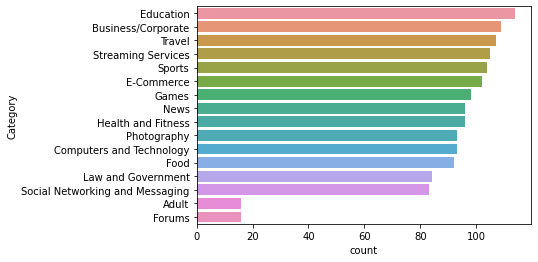

In [8]:
sns.countplot(y=website_df['Category'],order=website_df['Category'].value_counts().index[:16])

From the plot it can be seen that the **top 5 website categories are:**
    
 1.Educational

 2.Business/Corporate
    
 3.Travel

 4.Streaming Services
    
 5.Sports

#### Wordcloud

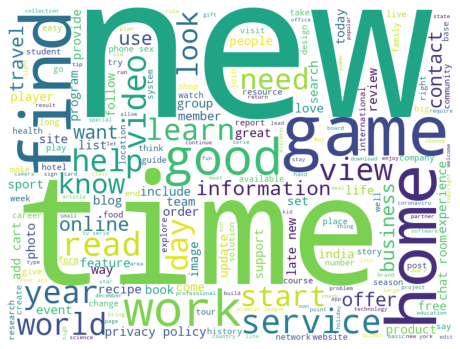

In [9]:
#More frequently occuring words appear larger.


from wordcloud import WordCloud,STOPWORDS
content=''
stopwords_df=set(STOPWORDS)

for i in website_df['cleaned_website_text']:
    tokens=i.split(' ')
    
    content=content+' '.join(tokens)+' '

wordcloud_df=WordCloud(width=800,height=600,background_color='white',stopwords=stopwords_df).generate(content)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wordcloud_df)

#### Total length of words on all websites (combined) of different categories 

In [10]:
#Education
sum_ed=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Education'):
        a= len(website_df['cleaned_website_text'][i])
        sum_ed=sum_ed+a
print('Total number of words including all the educational websites: ', sum_ed)



#Business/Corporate
sum_business=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Business/Corporate'):
        a= len(website_df['cleaned_website_text'][i])
        sum_business=sum_business+a
print('Total number of words including all the Business/Corporate website: ', sum_business)


#Travel
sum_travel=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Travel'):
        a= len(website_df['cleaned_website_text'][i])
        sum_travel=sum_travel+a
print('Total number of words including all the travel websites: ', sum_travel)


#Streaming services
sum_stream=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Streaming Services'):
        a= len(website_df['cleaned_website_text'][i])
        sum_stream=sum_stream+a
print('Total number of words including all the Streaming services websites: ', sum_stream)


#Sports
sum_sports=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Sports'):
        a= len(website_df['cleaned_website_text'][i])
        sum_sports=sum_sports+a
print('Total number of words including all the sports websites: ', sum_sports)


#E-commerce
sum_commerce=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='E-Commerce'):
        a= len(website_df['cleaned_website_text'][i])
        sum_commerce=sum_commerce+a
print('Total number of words including all the E-commerce website: ', sum_commerce)



#Games
sum_game=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Games'):
        a= len(website_df['cleaned_website_text'][i])
        sum_game=sum_game+a
print('Total number of words including all the games websites: ', sum_game)



#News
sum_news=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='News'):
        a= len(website_df['cleaned_website_text'][i])
        sum_news=sum_news+a
print('Total number of words including all the News websites: ', sum_news)



#Health and Fitness
sum_health=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Health and Fitness'):
        a= len(website_df['cleaned_website_text'][i])
        sum_health=sum_health+a
print('Total number of words including all the Health and Fitness websites: ', sum_health)



#Computers and Technology
sum_comp=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Computers and Technology'):
        a= len(website_df['cleaned_website_text'][i])
        sum_comp=sum_comp+a
print('Total number of words including all the Computers and Technology website: ', sum_comp)



#Photography
sum_photog=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Photography'):
        a= len(website_df['cleaned_website_text'][i])
        sum_photog=sum_photog+a
print('Total number of words including all the Photography websites: ', sum_photog)



#Food
sum_food=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Food'):
        a= len(website_df['cleaned_website_text'][i])
        sum_food=sum_food+a
print('Total number of words including all the Food websites: ', sum_food)



#Law and Government
sum_law=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Law and Government'):
        a= len(website_df['cleaned_website_text'][i])
        sum_law=sum_law+a
print('Total number of words including all the Law and Government websites: ', sum_law)



#Social Networking and Messaging
sum_social=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Social Networking and Messaging'):
        a= len(website_df['cleaned_website_text'][i])
        sum_social=sum_social+a
print('Total number of words including all the Social Networking and Messaging website: ', sum_social)



#Adult
sum_ad=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Adult'):
        a= len(website_df['cleaned_website_text'][i])
        sum_ad=sum_ad+a
print('Total number of words including all the adult websites: ', sum_ad)



#Forums
sum_forum=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Forums'):
        a= len(website_df['cleaned_website_text'][i])
        sum_forum=sum_forum+a
print('Total number of words including all the Forums websites: ', sum_forum)


l=[sum_ed,sum_forum,sum_news,sum_sports,sum_health,sum_comp,sum_ad,sum_photog,sum_social,sum_law,sum_food,sum_game,sum_stream,sum_travel,sum_business,sum_commerce]
x1=pd.Series(l).to_frame()
x2=pd.Series(['Education','Business/Corporate','Travel','Streaming Services','Sports','E-Commerce','Games','News','Health & Fitness','Computer and Technology','Photography','Food','Law & Government','Social Neworking & Messaging','Adult','Forums']).to_frame()
x3=pd.concat([x2,x1],axis=1,ignore_index=True)
x3.columns=['Website category','Sum of length of all the words on the site']
x3.sort_values(by='Sum of length of all the words on the site',ascending=False)

Total number of words including all the educational websites:  774075
Total number of words including all the Business/Corporate website:  387336
Total number of words including all the travel websites:  615047
Total number of words including all the Streaming services websites:  385775
Total number of words including all the sports websites:  854152
Total number of words including all the E-commerce website:  480333
Total number of words including all the games websites:  299445
Total number of words including all the News websites:  1020091
Total number of words including all the Health and Fitness websites:  534152
Total number of words including all the Computers and Technology website:  409889
Total number of words including all the Photography websites:  401760
Total number of words including all the Food websites:  437253
Total number of words including all the Law and Government websites:  443235
Total number of words including all the Social Networking and Messaging website:  

,Website category,Sum of length of all the words on the site
2,Travel,1020091
3,Streaming Services,854152
0,Education,774075
13,Social Neworking & Messaging,615047
4,Sports,534152
15,Forums,480333
9,Computer and Technology,443235
10,Photography,437253
5,E-Commerce,409889
7,News,401760


Text(0.5, 1.0, 'Category wise total number of characters on all the websites (combined)')

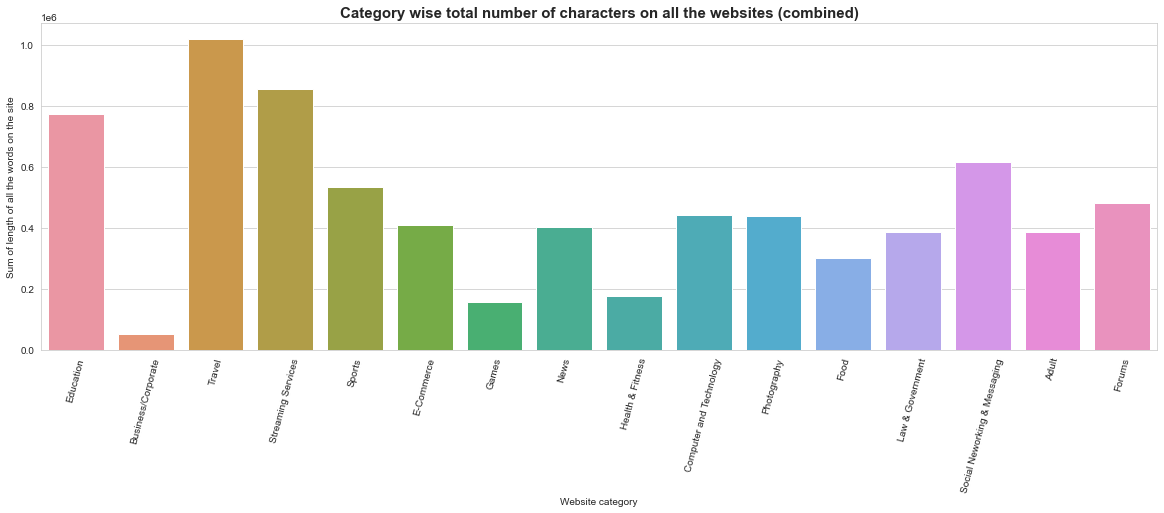

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,6))
sns.barplot(x='Website category',y='Sum of length of all the words on the site',data=x3)
plt.xticks(rotation=75)
plt.title('Category wise total number of characters on all the websites (combined)',fontweight='bold',fontsize=15)

The dataframe x3 and the plot above indicate the **total number of characters that have been used to make all the the websites of a particular category** or in other words, **the total length of the words that are there in all the websites of a particular category.**


**For example**- All the 107 travel websites have used 1020091 characters in total. 

The **top 5 website categories that have used maximum number of characters** are:

1.Travel

2.Streaming Services

3.Education

4.Social Networing & Messaging

5.Sports


### Applying algorithm (Bag of Words model)

In [12]:
from nltk.corpus import stopwords
import string

In [13]:
def text_process(value):
    nopunc=[char for char in value if char not in string.punctuation]   #Removes punctuation
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]  #Removes stopwords

In [14]:
website_df['cleaned_website_text'].apply(text_process).head()    #Getting the cleaned text

0    [official, site, good, hotel, accommodation, b...
1    [expedia, hotel, book, sites, like, use, vacat...
2    [tripadvisor, hotel, book, sites, like, previo...
3    [cheap, flights, search, compare, flights, mom...
4    [bot, create, free, account, create, free, acc...
Name: cleaned_website_text, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer        #CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(website_df['cleaned_website_text'])  #Fit

In [16]:
text_bow=bow_transformer.transform(website_df['cleaned_website_text'])  #Transform

In [17]:
print(text_bow.shape)

(1408, 60067)


In [18]:
from sklearn.feature_extraction.text import TfidfTransformer    #TfidfTransformer
tfidf_transform=TfidfTransformer().fit(text_bow)                #Fit

In [19]:
text_tfidf=tfidf_transform.transform(text_bow)      #Transform

#### MultinomialNB

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
website_class=MultinomialNB().fit(text_tfidf,website_df['Category'])

#### Splitting the data

In [22]:
from sklearn.model_selection import train_test_split
X=website_df['cleaned_website_text']
y=website_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

#### Using Pipeline feature of sklearn

In [23]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('BOW',CountVectorizer(analyzer=text_process)),('tfidf',TfidfTransformer()),('Classifier',MultinomialNB())])

In [24]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('BOW',
                 CountVectorizer(analyzer=<function text_process at 0x000001C6612B8700>)),
                ('tfidf', TfidfTransformer()),
                ('Classifier', MultinomialNB())])

In [25]:
predictions=pipeline.predict(X_test)

In [26]:
predictions

array(['Food', 'Business/Corporate', 'News', 'Travel',
       'Health and Fitness', 'Streaming Services',
       'Social Networking and Messaging', 'E-Commerce', 'News',
       'Education', 'E-Commerce', 'Business/Corporate', 'Education',
       'Social Networking and Messaging', 'Business/Corporate', 'News',
       'E-Commerce', 'Streaming Services', 'Food', 'Health and Fitness',
       'Education', 'Photography', 'Food', 'Sports', 'Travel',
       'Business/Corporate', 'Sports', 'News', 'E-Commerce',
       'Photography', 'E-Commerce', 'Law and Government', 'Travel',
       'Travel', 'Streaming Services', 'Health and Fitness', 'Sports',
       'Education', 'Travel', 'Health and Fitness', 'Business/Corporate',
       'Education', 'Photography', 'E-Commerce', 'Business/Corporate',
       'Computers and Technology', 'Streaming Services',
       'Business/Corporate', 'Education', 'News', 'Games', 'Games',
       'E-Commerce', 'Travel', 'Travel', 'Streaming Services',
       'Social Netwo

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification report: ')
print(classification_report(predictions,y_test))

Classification report: 
                                 precision    recall  f1-score   support

                          Adult       0.00      0.00      0.00         0
             Business/Corporate       0.97      0.76      0.85        38
       Computers and Technology       0.76      0.86      0.81        22
                     E-Commerce       0.93      0.90      0.91        29
                      Education       0.97      0.88      0.93        43
                           Food       0.95      1.00      0.98        21
                         Forums       0.00      0.00      0.00         0
                          Games       0.87      1.00      0.93        27
             Health and Fitness       0.91      1.00      0.95        31
             Law and Government       0.73      1.00      0.85        22
                           News       0.93      0.64      0.76        44
                    Photography       0.91      0.80      0.85        25
Social Networking and Mess

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix: 


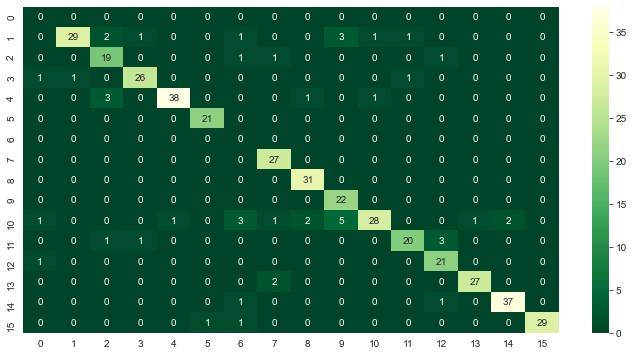

In [28]:
plt.figure(figsize=(12,6))
print('Confusion matrix: ')
sns.heatmap(confusion_matrix(predictions,y_test),annot=True,cmap='YlGn_r')

In [29]:
print(accuracy_score(predictions,y_test))

0.8865248226950354
